# Pandas básico

In [1]:
import pandas as pd

BASE = "dados/cereal_sem_negativos.csv"

df = pd.read_csv(BASE)

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     int64  
 10  potass    74 non-null     int64  
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.4+ KB


In [3]:
df.groupby(["mfr", "shelf"]).count()

name  type  calories  protein  fat  sodium  fiber  carbo  sugars  \
mfr shelf                                                                     
A   2         1     1         1        1    1       1      1      1       1   
G   1         6     6         6        6    6       6      6      6       6   
    2         7     7         7        7    7       7      7      7       7   
    3         9     9         9        9    9       9      9      9       9   
K   1         4     4         4        4    4       4      4      4       4   
    2         7     7         7        7    7       7      7      7       7   
    3        12    12        12       12   12      12     12     12      12   
N   1         3     3         3        3    3       3      3      3       3   
    2         1     1         1        1    1       1      1      1       1   
    3         1     1         1        1    1       1      1      1       1   
P   1         2     2         2        2    2       2      2      2       2   
    2         1     1         1        1    1       1      1      1       1   
    3         6     6         6        6    6       6      6      6       6   
Q   2         3     3         3        3    3       3      3      3       3   
    3         4     4         4        4    4       4      4      4       4   
R   1         4     4         4        4    4       4      4      4       4   
    3         3     3         3        3    3       3      3      3       3   

           potass  vitamins  weight  cups  rating  
mfr shelf                                          
A   2           1         1       1     1       1  
G   1           6         6       6     6       6  
    2           7         7       7     7       7  
    3           9         9       9     9       9  
K   1           4         4       4     4       4  
    2           7         7       7     7       7  
    3          12        12      12    12      12  
N   1           3         3       3     3       3  
    2           1         1       1     1       1  
    3           1         1       1     1       1  
P   1           2         2       2     2       2  
    2           1         1       1     1       1  
    3           6         6       6     6       6  
Q   2           3         3       3     3       3  
    3           4         4       4     4       4  
R   1           4         4       4     4       4  
    3           3         3       3     3       3

In [4]:
df.groupby(["mfr", "shelf"]).size()

mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    1         3
     2         1
     3         1
P    1         2
     2         1
     3         6
Q    2         3
     3         4
R    1         4
     3         3
dtype: int64

<Axes: xlabel='mfr,shelf'>

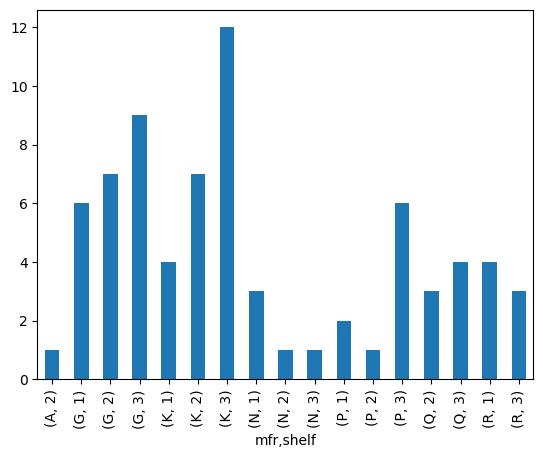

In [5]:
# gráfico de contagem mfr e shelf
df.groupby(["mfr", "shelf"]).size().plot(kind="bar")

O `unstack` é uma função que transforma um índice hierárquico em colunas. 


In [6]:
df.groupby(["mfr", "shelf"]).size().unstack()

shelf,1,2,3
mfr,,,
A,NaN,1.0,NaN
G,6.0,7.0,9.0
K,4.0,7.0,12.0
N,3.0,1.0,1.0
P,2.0,1.0,6.0
Q,NaN,3.0,4.0
R,4.0,NaN,3.0


<Axes: xlabel='mfr'>

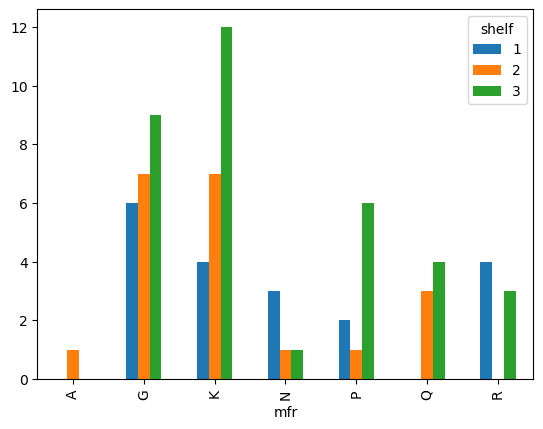

In [7]:
# gráfico de contagem de cereal por prateleira por fabricante
df.groupby(["mfr", "shelf"]).size().unstack().plot(kind="bar")

<Axes: xlabel='mfr'>

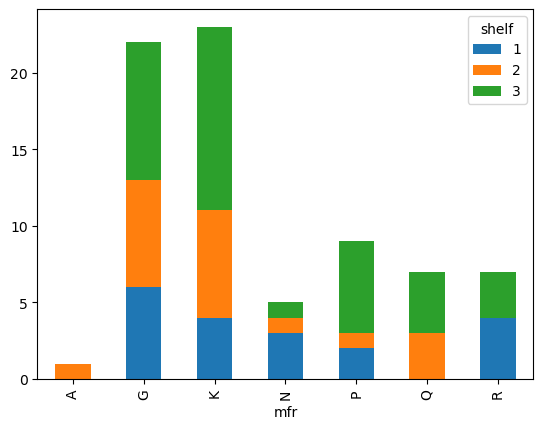

In [8]:
df.groupby(["mfr", "shelf"]).size().unstack().plot(kind="bar", stacked=True)

In [9]:
df.groupby(["mfr", "shelf"]).size().unstack().stack()


mfr  shelf
A    2         1.0
G    1         6.0
     2         7.0
     3         9.0
K    1         4.0
     2         7.0
     3        12.0
N    1         3.0
     2         1.0
     3         1.0
P    1         2.0
     2         1.0
     3         6.0
Q    2         3.0
     3         4.0
R    1         4.0
     3         3.0
dtype: float64

In [11]:
# exemplo de pivot_table
df.pivot_table(index="mfr", columns="shelf", aggfunc="size")

shelf,1,2,3
mfr,,,
A,NaN,1.0,NaN
G,6.0,7.0,9.0
K,4.0,7.0,12.0
N,3.0,1.0,1.0
P,2.0,1.0,6.0
Q,NaN,3.0,4.0
R,4.0,NaN,3.0


<Axes: xlabel='mfr'>

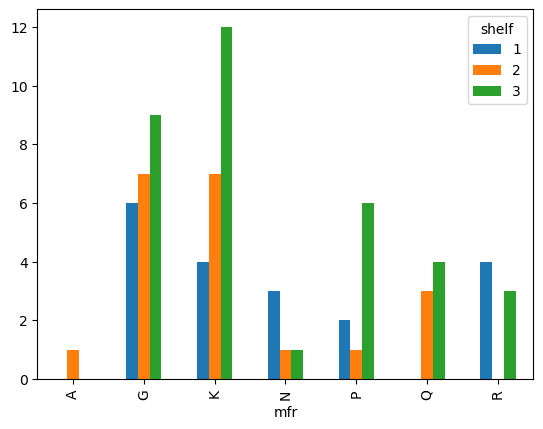

In [12]:
df.pivot_table(index="mfr", columns="shelf", aggfunc="size").plot(kind="bar")